<a href="https://colab.research.google.com/github/arpanchakraborty23/ML-Local/blob/main/submissionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
#DATA_SOURCE_MAPPING =playground-series-s4e6:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73290%2F8710574%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240616%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240616T173340Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3ddd814247a9f788a522559be241f0e2ddcc0b1afdb1a19477a340d984227151d19f9134372e3641d33555b784b9c2648fb5c8ef9fe892a4992d1f1f191042cf544f173fdab66af0e31f4030cee678d61687d3f35cbd5893be37f77088e553a22b3f5fcd489de3c4d37b031472fdfdd1075f5e83d6fd4d5a3f04c5d6984264e718ea289eb19ab87bfb7c89e57ad567f88396ed88c0b6d10d58d69ae9f315ec79aa84ba04ba5113e2ccba987e96d99e76401078d17ed66b55e1a9bf28e9c8eadc232be952ec996979e1444f428898d322be6d7ed559b20115f9f35b7e52fd2862144d37778e4c975f3a09f3cddef23d76edd8f262dc8e40b3172acbb98ee365f4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


SyntaxError: unterminated string literal (detected at line 23) (<ipython-input-3-266b70aa3aeb>, line 23)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


## Basic information

In [ ]:
train_df.shape

(76518, 38)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [ ]:
train_df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [ ]:
train_df.duplicated().sum()

0

# Obesrvation
The Datsets has zero no of duplicates and nan value

# Visuliztion

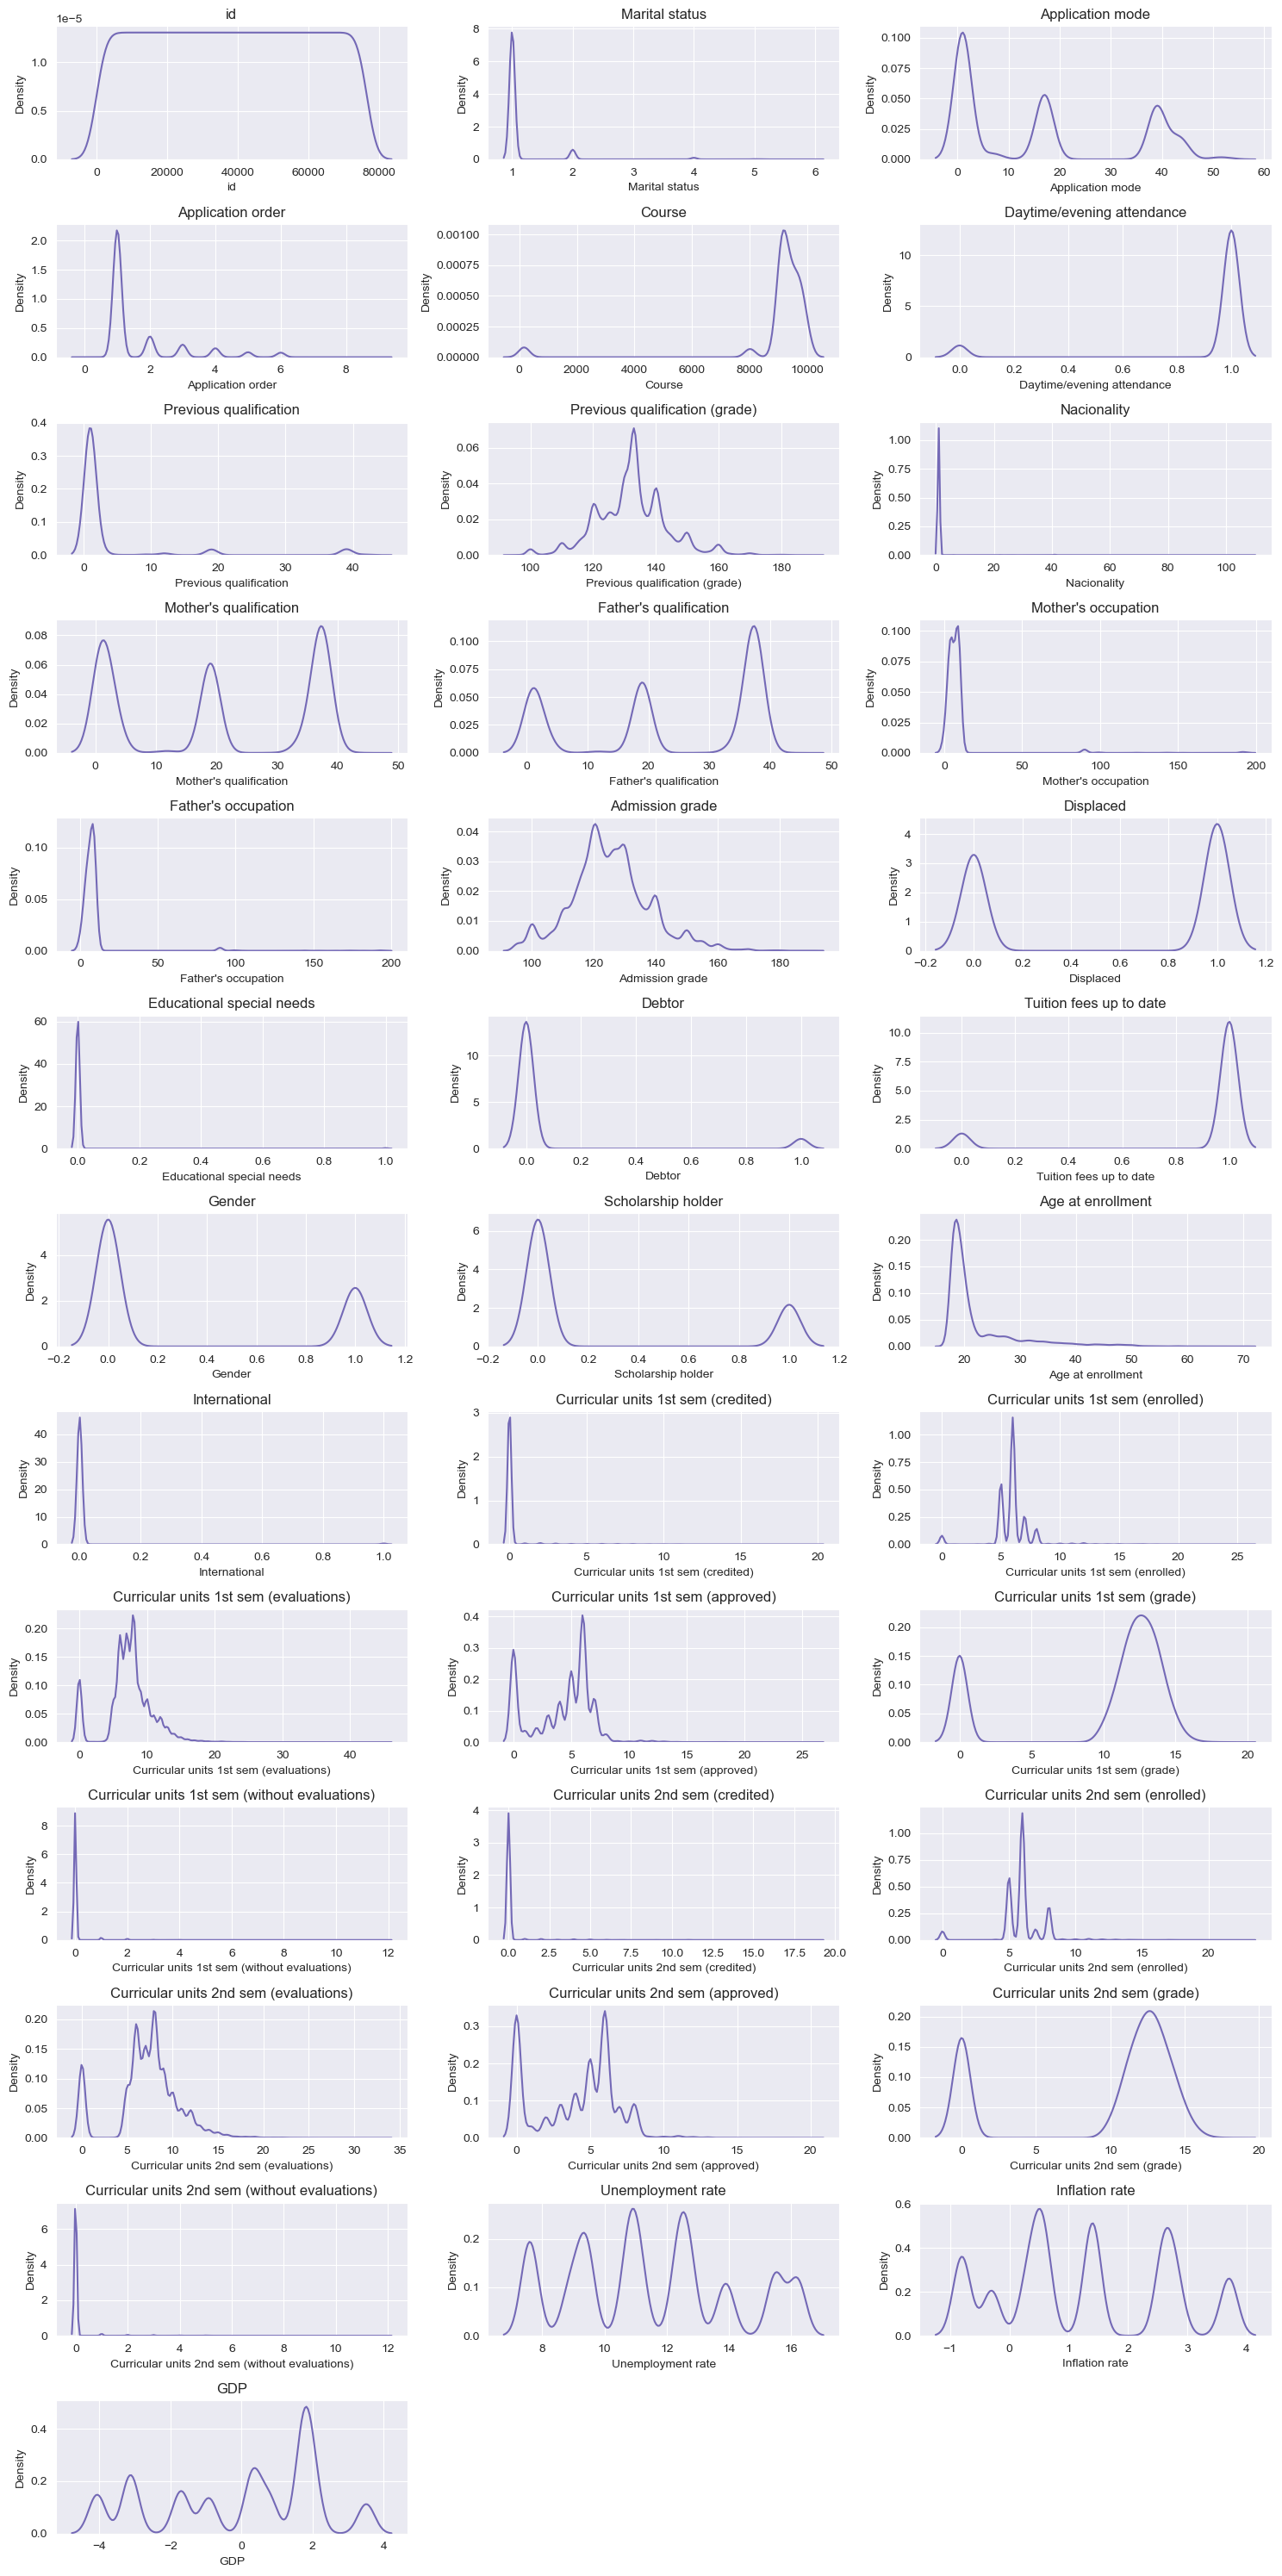

In [ ]:
# num_cols=train_df.select_dtypes(exclude='O')
# plt.figure(figsize=(15,30))
# sns.set_style('darkgrid')
# for i,col in enumerate(num_cols):
#     plt.subplot(13,3,i+1)
#     sns.kdeplot(num_cols[col],color='#7469B6')
#     plt.title(col)
# plt.tight_layout()
# plt.show()

In [ ]:
num_cols=train_df.select_dtypes(exclude='O')
plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
for i,col in enumerate(num_cols):
    plt.subplot(13,3,i+1)
    sns.boxplot(num_cols[col],color='#7469B6')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
train_df.head(2)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout


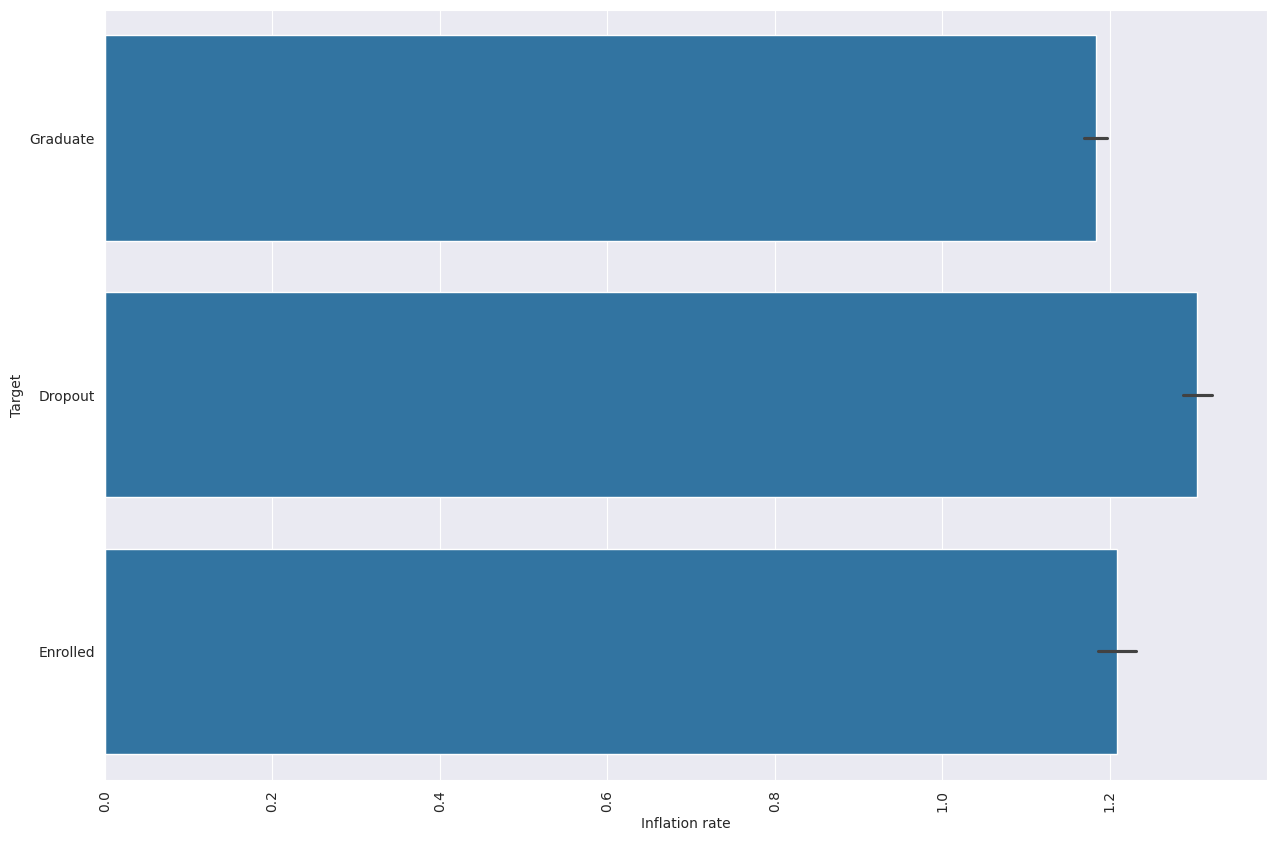

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=train_df['Inflation rate'],y=train_df['Target'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [ ]:
train_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [ ]:
train_df['Target']=train_df['Target'].map({'Dropout':0 ,'Graduate':1 ,'Enrolled':2 })

In [ ]:
test_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [ ]:
df=train_df.copy()

## Data Transform

In [ ]:
from sklearn.model_selection import train_test_split
x=train_df.iloc[:,:-1]
y=train_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
preprocess_obj=Pipeline(
        steps=[
            # ('Impute',KNNImputer(n_neighbors=5)),

            ('outliers',RobustScaler())
        ]
)
preprocess_obj

Pipeline(steps=[('outliers', RobustScaler())])

## Model Cretion

In [ ]:
x_train=preprocess_obj.fit_transform(x_train)
x_test=preprocess_obj.transform(x_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
models={
                'LogisticRegressionLogisticRegression(multi_class='multinomial'),
                'KNeighborsClassifier KNeighborsClassifier(),
                'DesisionTreeDecisionTreeClassifier(),
                'RandomForestRandomForestClassifier(),
                'BaggingClfBaggingClassifier(),
                'XgboostXGBClassifier(),
                'SupportVectorSVC()
            }

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score

In [ ]:
def model_evaluatuion(x_train,y_train,x_test,y_test,models):
            report={}
            for i in range(len(models)):
                model = list(models.values())[i]

                # Train model
                model.fit(x_train,y_train)



                # Predict Testing data
                y_test_pred =model.predict(x_test)


                test_model_score = accuracy_score(y_test,y_test_pred)*100

                report[list(models.keys())[i]] =  test_model_score

            return report

In [ ]:
# model_evaluatuion(x_train,y_train,x_test,y_test,models)

In [ ]:
from sklearn.metrics import RocCurveDisplay,accuracy_score

In [ ]:

xg=XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.3, max_depth= 3, n_estimators= 200, sub_sample= 1.0)
xg.fit(x_train,y_train)
# Predict Testing data
y_test_pred =xg.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100

In [ ]:
test_model_score

83.03188708834291

In [ ]:

bclf=BaggingClassifier(max_samples=0.5, n_estimators= 200)
bclf.fit(x_train,y_train)
# Predict Testing data
y_test_pred =bclf.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score

82.14323052796655

In [ ]:
random=RandomForestClassifier(max_depth =None, min_samples_leaf =1, min_samples_split= 2, n_estimators =200)
random.fit(x_train,y_train)
# Predict Testing data
y_test_pred =random.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score

82.4777835859906

In [ ]:
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
dt.fit(x_train,y_train)
# Predict Testing data
y_test_pred =dt.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score

81.11343439623629

In [ ]:
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10, weights= 'uniform')
knn.fit(x_train,y_train)
# Predict Testing data
y_test_pred =knn.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score

78.6983795086252

In [ ]:
log=LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
log.fit(x_train,y_train)
# Predict Testing data
y_test_pred =log.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score

80.893883951908

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
# Predict Testing data
y_test_pred =svc.predict(x_test)
test_model_score = accuracy_score(y_test,y_test_pred)*100
test_model_score